<a href="https://colab.research.google.com/github/vctcar/focus-foo/blob/main/pyramiding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '3b5587912738451d831aee4029f1a078')

In [4]:
results = search_images_bing(key, 'tortoise')
ims = results.attrgot('contentUrl')
len(ims)

150

In [12]:
dest = 'image/tortoise.jpg'


'image/tortoise.jpg'

In [15]:
#if something breaks its because this code here

download_url(ims[1], dest)

Path('image/tortoise.jpg')

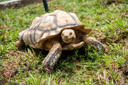

In [16]:
im = Image.open(dest)
im.to_thumb(128,128)

In [17]:
tortoise_types = 'Testudo horsfielii', 'Testudo Graeca', 'Testudo hermanni', 'Testudo marginata', 'Sulcata', 'Indian Star'
path = Path('Tortoise')

In [18]:
if not path.exists():
    path.mkdir()
    for o in tortoise_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} tortoise')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [19]:
fns = get_image_files(path)
fns

(#820) [Path('Tortoise/Testudo hermanni/9c1361bb-95a8-43c3-90a6-6f1db909058d.jpg'),Path('Tortoise/Testudo hermanni/6b242f85-7004-4199-8583-6a1228d07bfd.jpg'),Path('Tortoise/Testudo hermanni/418cc24f-1a24-43d1-8093-fb2c589fee50.jpg'),Path('Tortoise/Testudo hermanni/9d90dd37-b16f-4a6b-b496-3bd470f6a635.jpg'),Path('Tortoise/Testudo hermanni/314bd10f-e33e-4d74-8a0f-48c929febc5c.jpg'),Path('Tortoise/Testudo hermanni/519663be-040c-417c-af27-f56d8f2f82a8.jpg'),Path('Tortoise/Testudo hermanni/68df5468-a343-46e0-89c1-9f0baefbeada.jpg'),Path('Tortoise/Testudo hermanni/5f0a0658-0a42-4f3f-9d88-bbecb86335a4.jpg'),Path('Tortoise/Testudo hermanni/3d2ac66a-2b68-4cb8-b532-af1eea187934.jpg'),Path('Tortoise/Testudo hermanni/3671a105-1795-4a66-9271-f8ed1880bdc5.jpg')...]

In [20]:
failed = verify_images(fns)
failed

(#5) [Path('Tortoise/Testudo hermanni/c03380e6-5c40-4b2a-9065-0a4327abc64b.jpg'),Path('Tortoise/Testudo Graeca/0a404c01-800f-4b03-9012-2faa5f3e16ba.jpg'),Path('Tortoise/Indian Star/b6fce342-3e90-42d5-aa60-6373bbcbe619.jpg'),Path('Tortoise/Testudo marginata/b9d42e60-c8c0-4c07-9551-46ffa1c863e1.jpg'),Path('Tortoise/Testudo marginata/cc940b4c-216a-4f5d-a318-06ef5e279a98.jpg')]

In [21]:
failed.map(Path.unlink);

In [22]:
tortoises = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [23]:
dls = tortoises.dataloaders(path)

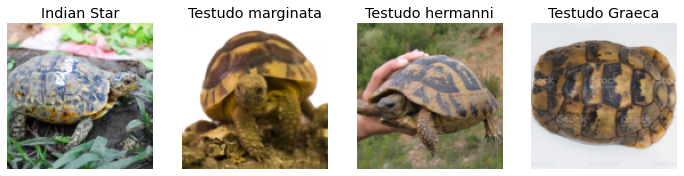

In [24]:
dls.valid.show_batch(max_n=4, nrows=1)

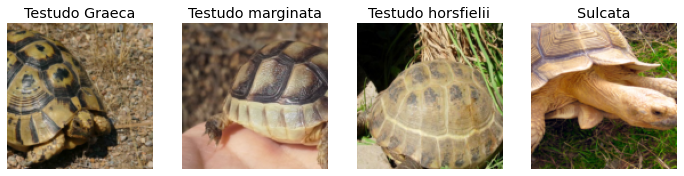

In [25]:
tortoises = tortoises.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = tortoises.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=False)

In [26]:
tortoises = tortoises.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = tortoises.dataloaders(path)

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.701487,1.319312,0.447853,00:24


epoch,train_loss,valid_loss,error_rate,time
0,1.505170,1.048595,0.300613,00:22
1,1.289393,0.839478,0.282209,00:23
2,1.094399,0.732203,0.294479,00:21
3,0.943314,0.716193,0.282209,00:23


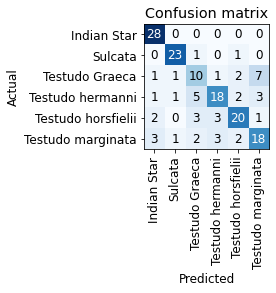

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [31]:
learn.export()

In [32]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [33]:
learn_inf = load_learner(path/'export.pkl')

In [34]:
learn_inf.dls.vocab

['Indian Star', 'Sulcata', 'Testudo Graeca', 'Testudo hermanni', 'Testudo horsfielii', 'Testudo marginata']

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
img = btn_upload.data[-1]

In [39]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [40]:
pred,pred_idx,probs = learn_inf.predict(img)

In [41]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Testudo Graeca; Probability: 0.6658')

In [42]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [43]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [44]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [46]:
#hide_output
VBox([widgets.Label('Select your tortoise!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 